In [86]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

#Работа с данными

In [2]:
df = pd.read_csv('titanic_train.csv')

In [3]:
df

,Unnamed: 0,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,0,332,1,"Partner, Mr. Austen",male,45.5,0,0,113043,28.5000,C124,S,0
1,1,734,2,"Berriman, Mr. William John",male,23.0,0,0,28425,13.0000,NaN,S,0
2,2,383,3,"Tikkanen, Mr. Juho",male,32.0,0,0,STON/O 2. 3101293,7.9250,NaN,S,0
3,3,705,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,350025,7.8542,NaN,S,0
4,4,814,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,707,107,3,"Salkjelsvik, Miss. Anna Kristine",female,21.0,0,0,343120,7.6500,NaN,S,1
708,708,271,1,"Cairns, Mr. Alexander",male,NaN,0,0,113798,31.0000,NaN,S,0
709,709,861,3,"Hansen, Mr. Claus Peter",male,41.0,2,0,350026,14.1083,NaN,S,0
710,710,436,1,"Carter, Miss. Lucile Polk",female,14.0,1,2,113760,120.0000,B96 B98,S,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   712 non-null    int64  
 1   PassengerId  712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          572 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        159 non-null    object 
 11  Embarked     710 non-null    object 
 12  Survived     712 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 72.4+ KB


In [5]:
df2 = df.drop(columns=['Cabin', 'Unnamed: 0'])

In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Pclass       712 non-null    int64  
 2   Name         712 non-null    object 
 3   Sex          712 non-null    object 
 4   Age          572 non-null    float64
 5   SibSp        712 non-null    int64  
 6   Parch        712 non-null    int64  
 7   Ticket       712 non-null    object 
 8   Fare         712 non-null    float64
 9   Embarked     710 non-null    object 
 10  Survived     712 non-null    int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 61.3+ KB


In [7]:
df2['Age'].describe()

count    572.000000
mean      29.498846
std       14.500059
min        0.420000
25%       21.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<Axes: >

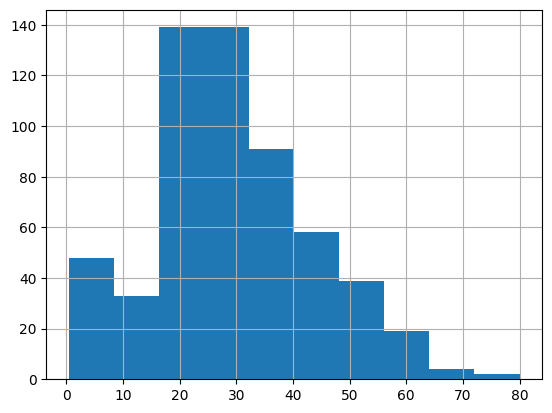

In [8]:
df2['Age'].hist()

In [15]:
#интерполируем пустые значения столбца "Age"

df3 = df2.copy()
df3['Age'] = df3['Age'].interpolate()
df3 = df3.dropna()

In [10]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 710 entries, 0 to 711
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  710 non-null    int64  
 1   Pclass       710 non-null    int64  
 2   Name         710 non-null    object 
 3   Sex          710 non-null    object 
 4   Age          710 non-null    float64
 5   SibSp        710 non-null    int64  
 6   Parch        710 non-null    int64  
 7   Ticket       710 non-null    object 
 8   Fare         710 non-null    float64
 9   Embarked     710 non-null    object 
 10  Survived     710 non-null    int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 66.6+ KB


In [11]:
#проверяем что статистика по этому столбцу не изменилась после интерполяции

df3['Age'].describe()

count    710.000000
mean      29.282697
std       13.730286
min        0.420000
25%       21.000000
50%       28.000000
75%       37.000000
max       80.000000
Name: Age, dtype: float64

<Axes: >

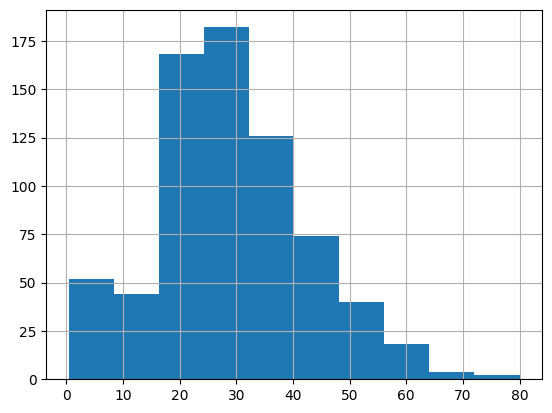

In [12]:
df3['Age'].hist()

видим, что структура данных не изменилась, это круто!

In [20]:
# Кодирование категориальной переменной "Sex"

label_encoder = LabelEncoder()
df3['Sex'] = label_encoder.fit_transform(df3['Sex'])
df3

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,332,1,"Partner, Mr. Austen",1,45.5,0,0,113043,28.5000,S,0
1,734,2,"Berriman, Mr. William John",1,23.0,0,0,28425,13.0000,S,0
2,383,3,"Tikkanen, Mr. Juho",1,32.0,0,0,STON/O 2. 3101293,7.9250,S,0
3,705,3,"Hansen, Mr. Henrik Juul",1,26.0,1,0,350025,7.8542,S,0
4,814,3,"Andersson, Miss. Ebba Iris Alfrida",0,6.0,4,2,347082,31.2750,S,0
...,...,...,...,...,...,...,...,...,...,...,...
707,107,3,"Salkjelsvik, Miss. Anna Kristine",0,21.0,0,0,343120,7.6500,S,1
708,271,1,"Cairns, Mr. Alexander",1,31.0,0,0,113798,31.0000,S,0
709,861,3,"Hansen, Mr. Claus Peter",1,41.0,2,0,350026,14.1083,S,0
710,436,1,"Carter, Miss. Lucile Polk",0,14.0,1,2,113760,120.0000,S,1


In [42]:
df3['Age'] = df3['Age'].astype(int)
df3['Fare'] = df3['Fare'].astype(int)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 710 entries, 0 to 711
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  710 non-null    int64 
 1   Pclass       710 non-null    int64 
 2   Name         710 non-null    object
 3   Sex          710 non-null    int64 
 4   Age          710 non-null    int64 
 5   SibSp        710 non-null    int64 
 6   Parch        710 non-null    int64 
 7   Ticket       710 non-null    object
 8   Fare         710 non-null    int64 
 9   Embarked     710 non-null    object
 10  Survived     710 non-null    int64 
dtypes: int64(8), object(3)
memory usage: 66.6+ KB


#Предсказывание данных и вычисление метрик


In [47]:
# Определение признаков и целевой переменной
X = df3[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y = df3['Survived']

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## K-ближайших соседей (K-Nearest Neighbors, KNN)

In [75]:
knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
y_pred1 = knn.predict(X_test)

accuracy1 = accuracy_score(y_test, y_pred1)
recall1 = recall_score(y_test, y_pred1)
precision1 = precision_score(y_test, y_pred1)
f11 = f1_score(y_test, y_pred1)
print("Accuracy:", accuracy1)
print("Recall:", recall1)
print("Precision:", precision1)
print("F1:", f11)

Accuracy: 0.6619718309859155
Recall: 0.5230769230769231
Precision: 0.6666666666666666
Ff1: 0.5862068965517241


##Градиентный бустинг (Gradient Boosting)

In [74]:
gradboost = GradientBoostingClassifier(random_state=0)
gradboost.fit(X_train, y_train)
y_pred2 = gradboost.predict(X_test)

accuracy2 = accuracy_score(y_test, y_pred2)
recall2 = recall_score(y_test, y_pred2)
precision2 = precision_score(y_test, y_pred2)
f12 = f1_score(y_test, y_pred2)
print("Accuracy:", accuracy2)
print("Recall:", recall2)
print("Precision:", precision2)
print("F1:", f12)

Accuracy: 0.7746478873239436
Recall: 0.6461538461538462
Precision: 0.8235294117647058
Ff1: 0.7241379310344827


##Метод случайного леса

In [76]:
randfor = RandomForestClassifier(random_state=0).fit(X_train, y_train)
y_pred3 = randfor.predict(X_test)

accuracy3 = accuracy_score(y_test, y_pred3)
recall3 = recall_score(y_test, y_pred3)
precision3 = precision_score(y_test, y_pred3)
f13 = f1_score(y_test, y_pred3)
print("Accuracy:", accuracy3)
print("Recall:", recall3)
print("Precision:", precision3)
print("F1:", f13)

Accuracy: 0.7605633802816901
Recall: 0.676923076923077
Precision: 0.7719298245614035
Ff1: 0.7213114754098361


##Наивный байесовский классификатор

In [77]:
nb = GaussianNB().fit(X_train, y_train)
y_pred4 = nb.predict(X_test)

accuracy4 = accuracy_score(y_test, y_pred4)
recall4 = recall_score(y_test, y_pred4)
precision4 = precision_score(y_test, y_pred4)
f14 = f1_score(y_test, y_pred4)
print("Accuracy:", accuracy4)
print("Recall:", recall4)
print("Precision:", precision4)
print("F1:", f14)

Accuracy: 0.7816901408450704
Recall: 0.7384615384615385
Precision: 0.7741935483870968
Ff1: 0.7559055118110236


## Логистическая регрессия

In [78]:
logmodel = LogisticRegression().fit(X_train, y_train)
y_pred5 = logmodel.predict(X_test)

accuracy5 = accuracy_score(y_test, y_pred5)
recall5 = recall_score(y_test, y_pred5)
precision5 = precision_score(y_test, y_pred5)
f15 = f1_score(y_test, y_pred5)
print("Accuracy:", accuracy5)
print("Recall:", recall5)
print("Precision:", precision5)
print("F1:", f15)

Accuracy: 0.8028169014084507
Recall: 0.7384615384615385
Precision: 0.8135593220338984
Ff1: 0.7741935483870969


#Вывод итогов

In [83]:
# Создание словаря с результатами метрик для каждой модели
metrics = {
    'KNN': [accuracy1, recall1, precision1, f11],
    'Gradient Boosting': [accuracy2, recall2, precision2, f12],
    'Random Forest': [accuracy3, recall3, precision3, f13],
    'Naive Bayes': [accuracy4, recall4, precision4, f14],
    'Logistic Regression': [accuracy5, recall5, precision5, f15]
}

metrics_df = pd.DataFrame(metrics, index=['Accuracy', 'Recall', 'Precision', 'F1'], columns=['KNN', 'Gradient Boosting', 'Random Forest', 'Naive Bayes', 'Logistic Regression'])

metrics_df = metrics_df.T

print(metrics_df)

                     Accuracy    Recall  Precision        F1
KNN                  0.661972  0.523077   0.666667  0.586207
Gradient Boosting    0.774648  0.646154   0.823529  0.724138
Random Forest        0.760563  0.676923   0.771930  0.721311
Naive Bayes          0.781690  0.738462   0.774194  0.755906
Logistic Regression  0.802817  0.738462   0.813559  0.774194


Таким образом мы находим модель с наибольшим accuracy - Logistic Regression!
